In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)



In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for i in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy'])


In [9]:
logdir='./dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file=os.path.join(logdir,'fashion_mnist_model.h5')
callbacks=[keras.callbacks.TensorBoard(logdir),keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
          keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
history=model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=100,callbacks=callbacks)


Epoch 1/100
1719/1719 [==============================] - 11s 5ms/step - loss: 2.3016 - accuracy: 0.1392 - val_loss: 2.3007 - val_accuracy: 0.2116
Epoch 2/100
1719/1719 [==============================] - 8s 5ms/step - loss: 2.2996 - accuracy: 0.2195 - val_loss: 2.2981 - val_accuracy: 0.2686
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2958 - accuracy: 0.2568 - val_loss: 2.2924 - val_accuracy: 0.3060
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2868 - accuracy: 0.3029 - val_loss: 2.2788 - val_accuracy: 0.2950
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2652 - accuracy: 0.2812 - val_loss: 2.2444 - val_accuracy: 0.2626
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 2.1898 - accuracy: 0.2602 - val_loss: 2.0757 - val_accuracy: 0.2560
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 1.6488 - accuracy: 0.3678 - val_loss: 1.2447 - val_a

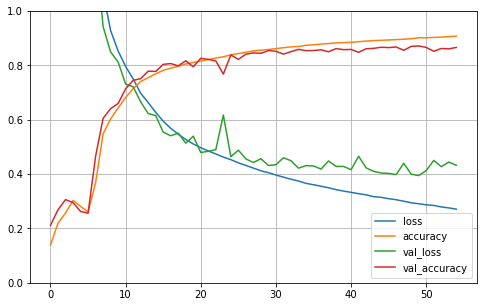

In [11]:
def plot_history_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_history_curves(history)


In [12]:
model.evaluate(x_test_scaled,y_test,verbose=0)

[0.4890463948249817, 0.8514000177383423]

In [13]:
model_bn=keras.models.Sequential()
model_bn.add(keras.layers.Flatten(input_shape=[28,28]))
for i in range(20):
    model_bn.add(keras.layers.Dense(100,activation='relu'))
    model_bn.add(keras.layers.BatchNormalization())
model_bn.add(keras.layers.Dense(10,activation='softmax'))
model_bn.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy'])

In [14]:
logdir_bn='./dnn-bn-callbacks'
if not os.path.exists(logdir_bn):
    os.mkdir(logdir_bn)
output_model_file_bn=os.path.join(logdir_bn,'fashion_mnist_model.h5')
callbacks=[keras.callbacks.TensorBoard(logdir_bn),keras.callbacks.ModelCheckpoint(output_model_file_bn,save_best_only=True),
          keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
history_bn=model_bn.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=100,callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 29s 13ms/step - loss: 1.8075 - accuracy: 0.3910 - val_loss: 0.9521 - val_accuracy: 0.6588
Epoch 2/100
1719/1719 [==============================] - 15s 9ms/step - loss: 1.0687 - accuracy: 0.6223 - val_loss: 0.7726 - val_accuracy: 0.7174
Epoch 3/100
1719/1719 [==============================] - 20s 12ms/step - loss: 0.9477 - accuracy: 0.6659 - val_loss: 0.6934 - val_accuracy: 0.7436
Epoch 4/100
1719/1719 [==============================] - 23s 13ms/step - loss: 0.8703 - accuracy: 0.6921 - val_loss: 0.6432 - val_accuracy: 0.7696
Epoch 5/100
1719/1719 [==============================] - 20s 12ms/step - loss: 0.8181 - accuracy: 0.7120 - val_loss: 0.6096 - val_accuracy: 0.7834
Epoch 6/100
1719/1719 [==============================] - 19s 11ms/step - loss: 0.7896 - accuracy: 0.7203 - val_loss: 0.5808 - val_accuracy: 0.7864
Epoch 7/100
1719/1719 [==============================] - 19s 11ms/step - loss: 0.7511 - accuracy: 0.7331 - val_loss: 0.

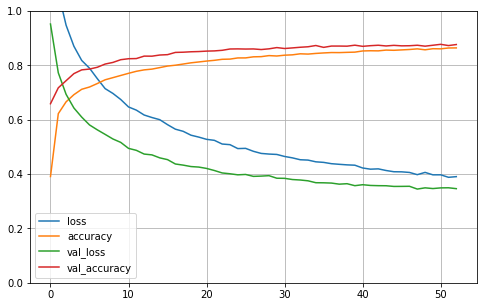

In [15]:
plot_history_curves(history_bn)

In [16]:
model_bn.evaluate(x_test_scaled,y_test,verbose=0)

[0.3845539689064026, 0.866599977016449]

In [17]:
model_selu=keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=[28,28]))
for i in range(20):
    model_selu.add(keras.layers.Dense(100,activation='selu'))
    model_selu.add(keras.layers.BatchNormalization())
model_selu.add(keras.layers.Dense(10,activation='softmax'))
model_selu.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy'])
logdir_selu='./dnn-selu-callbacks'
if not os.path.exists(logdir_selu):
    os.mkdir(logdir_selu)
output_model_file_selu=os.path.join(logdir_selu,'fashion_mnist_model.h5')
callbacks=[keras.callbacks.TensorBoard(logdir_selu),keras.callbacks.ModelCheckpoint(output_model_file_selu,save_best_only=True),
          keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
history_selu=model_selu.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=100,callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 37s 18ms/step - loss: 0.8803 - accuracy: 0.7004 - val_loss: 0.5269 - val_accuracy: 0.8112
Epoch 2/100
1719/1719 [==============================] - 20s 12ms/step - loss: 0.6474 - accuracy: 0.7724 - val_loss: 0.4530 - val_accuracy: 0.8362
Epoch 3/100
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5826 - accuracy: 0.7941 - val_loss: 0.4234 - val_accuracy: 0.8472
Epoch 4/100
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5418 - accuracy: 0.8082 - val_loss: 0.4029 - val_accuracy: 0.8524
Epoch 5/100
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5167 - accuracy: 0.8183 - val_loss: 0.3881 - val_accuracy: 0.8600
Epoch 6/100
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4962 - accuracy: 0.8241 - val_loss: 0.3781 - val_accuracy: 0.8600
Epoch 7/100
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4817 - accuracy: 0.8275 - val_loss: 0

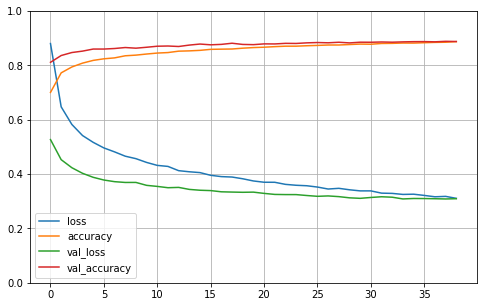

In [18]:
plot_history_curves(history_selu)

In [24]:
model_selu.evaluate(x_test_scaled,y_test,verbose=0)

[0.3338165879249573, 0.8780999779701233]

In [37]:
model_dropout=keras.models.Sequential()
model_dropout.add(keras.layers.Flatten(input_shape=[28,28]))
for i in range(20):
    model_dropout.add(keras.layers.Dense(100,activation='selu'))
    model_selu.add(keras.layers.BatchNormalization())
model_dropout.add(keras.layers.AlphaDropout(rate=0.2))
model_dropout.add(keras.layers.Dense(10,activation='softmax'))
model_dropout.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy'])
logdir_alphadropout='./dnn-alphadropout-callbacks'
if not os.path.exists(logdir_dropout):
    os.mkdir(logdir_dropout)
output_model_file_alphadropout=os.path.join(logdir_dropout,'fashion_mnist_model.h5')
callbacks=[keras.callbacks.TensorBoard(logdir_dropout),keras.callbacks.ModelCheckpoint(output_model_file_dropout,save_best_only=True),
          keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
history_dropout=model_dropout.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=100,callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 16s 8ms/step - loss: 0.9015 - accuracy: 0.6904 - val_loss: 0.5480 - val_accuracy: 0.8200
Epoch 2/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5596 - accuracy: 0.8084 - val_loss: 0.5260 - val_accuracy: 0.8352
Epoch 3/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4894 - accuracy: 0.8303 - val_loss: 0.4611 - val_accuracy: 0.8494
Epoch 4/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4478 - accuracy: 0.8449 - val_loss: 0.4396 - val_accuracy: 0.8554
Epoch 5/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4169 - accuracy: 0.8537 - val_loss: 0.4424 - val_accuracy: 0.8574
Epoch 6/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3965 - accuracy: 0.8616 - val_loss: 0.4342 - val_accuracy: 0.8634
Epoch 7/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3783 - accuracy: 0.8677 - val_loss: 0.4142 - 

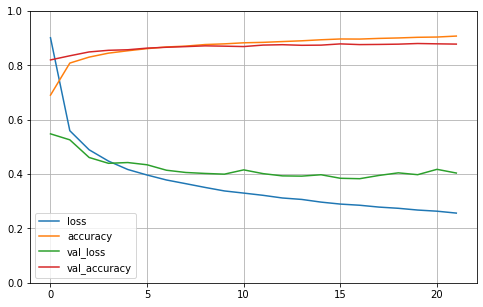

In [38]:
plot_history_curves(history_dropout)

In [39]:
model_dropout.evaluate(x_test_scaled,y_test,verbose=0)

[0.473176509141922, 0.8629999756813049]

In [42]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
from sklearn.model_selection import train_test_split
x_train_all_house,x_test_house,y_train_all_house,y_test_house = train_test_split(housing.data,housing.target,random_state=7)
x_train_house,x_valid_house,y_train_house,y_valid_house=train_test_split(x_train_all_house,y_train_all_house,random_state=11)

scaler_house = StandardScaler()
x_train_house_scaled = scaler_house.fit_transform(x_train_house)
x_valid_house_scaled = scaler_house.transform(x_valid_house)
x_test_house_scaled = scaler_house.transform(x_test_house)


Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.6477 - val_loss: 0.8502
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6915 - val_loss: 0.7266
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6434 - val_loss: 0.6830
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6143 - val_loss: 0.6542
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5917 - val_loss: 0.6322
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5723 - val_loss: 0.6117
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5559 - val_loss: 0.5962
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5423 - val_loss: 0.5818
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5302 - val_loss: 0.5676
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5193 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3654 - val_loss: 0.3865
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3640 - val_loss: 0.3862
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3644 - val_loss: 0.3848
Epoch 84/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3624 - val_loss: 0.3831
Epoch 85/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3612 - val_loss: 0.3829
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3603 - val_loss: 0.3807
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3598 - val_loss: 0.3818
Epoch 88/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3611 - val_loss: 0.3817
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3587 - val_loss: 0.3784
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3580 - val_loss: 

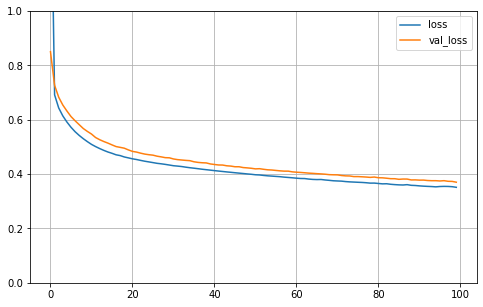

In [46]:
#deep model
input=keras.layers.Input(shape=x_train_house.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)

concat=keras.layers.concatenate([input,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input],outputs=[output])
model.compile(loss='mse',optimizer=keras.optimizers.SGD(0.001))
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
history_house1=model.fit(x_train_house_scaled,y_train_house,validation_data=(x_valid_house_scaled,y_valid_house),epochs=100,callbacks=callbacks)
plot_history_curves(history_house1)

In [47]:
model.evaluate(x_test_house_scaled,y_test_house,verbose=0)

0.3674677014350891

In [48]:
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel,self).__init__()
        self.hidden1_layer=keras.layers.Dense(30,activation='relu')
        self.hidden2_layer=keras.layers.Dense(30,activation='relu')
        self.output_layer=keras.layers.Dense(1)
    def call(self,input):
        hidden1=self.hidden1_layer(input)
        hidden2=self.hidden2_layer(hidden1)
        concat=keras.layers.concatenate([input,hidden2])
        output=self.output_layer(concat)
        return output


Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 2.5430 - val_loss: 0.8711
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7168 - val_loss: 0.7282
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6402 - val_loss: 0.6797
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6055 - val_loss: 0.6568
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5762 - val_loss: 0.6213
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5538 - val_loss: 0.5971
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5354 - val_loss: 0.5743
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5190 - val_loss: 0.5671
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5064 - val_loss: 0.5416
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4963 - val_lo

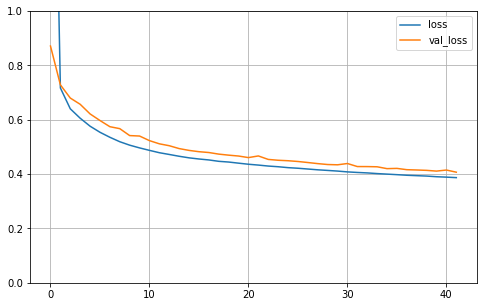

In [50]:
model=WideDeepModel()
model.build(input_shape=(None,8))
model.compile(loss='mse',optimizer=keras.optimizers.SGD(0.001))
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
history_house1=model.fit(x_train_house_scaled,y_train_house,validation_data=(x_valid_house_scaled,y_valid_house),epochs=100,callbacks=callbacks)
plot_history_curves(history_house1)

In [51]:
model.evaluate(x_test_house_scaled,y_test_house,verbose=0)

0.40409886837005615

In [64]:
input_wide=keras.layers.Input(shape=[5])
input_deep=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation='relu')(input_deep)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_wide,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_wide,input_deep],outputs=[output])
model.compile(loss='mse',optimizer=keras.optimizers.SGD(0.001))
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]


In [65]:
x_train_house_scaled_wide=x_train_house_scaled[:,:5]
x_train_house_scaled_deep=x_train_house_scaled[:,2:]
x_valid_house_scaled_wide=x_valid_house_scaled[:,:5]
x_valid_house_scaled_deep=x_valid_house_scaled[:,2:]
x_test_house_scaled_wide=x_test_house_scaled[:,:5]
x_test_house_scaled_deep=x_test_house_scaled[:,2:]

Epoch 1/100
363/363 [==============================] - 3s 4ms/step - loss: 1.6021 - val_loss: 0.8836
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7464 - val_loss: 0.7506
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6773 - val_loss: 0.6993
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6357 - val_loss: 0.6611
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6080 - val_loss: 0.6360
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.6141
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5621 - val_loss: 0.5874
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5448 - val_loss: 0.5697
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5283 - val_loss: 0.5564
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5152 - val_lo

363/363 [==============================] - 1s 3ms/step - loss: 0.3818 - val_loss: 0.3985
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3808 - val_loss: 0.3973
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3792 - val_loss: 0.3970
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3788 - val_loss: 0.3953
Epoch 85/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3778 - val_loss: 0.3956
Epoch 86/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3774 - val_loss: 0.3939
Epoch 87/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3767 - val_loss: 0.3935
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3757 - val_loss: 0.3928
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3754 - val_loss: 0.3924
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3748 - val_loss: 

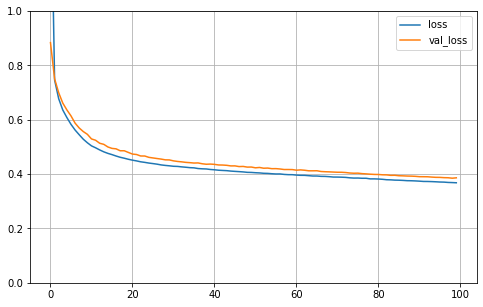

0.38108327984809875

In [66]:
history=model.fit([x_train_house_scaled_wide,x_train_house_scaled_deep],y_train_house,validation_data=([x_valid_house_scaled_wide,x_valid_house_scaled_deep],y_valid_house),epochs=100,callbacks=callbacks)
plot_history_curves(history)
model.evaluate([x_test_house_scaled_wide,x_test_house_scaled_deep],y_test_house,verbose=0)

In [67]:
input_wide=keras.layers.Input(shape=[5])
input_deep=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation='relu')(input_deep)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_wide,hidden2])
output=keras.layers.Dense(1)(concat)
output2=keras.layers.Dense(1)(hidden2)
model=keras.models.Model(inputs=[input_wide,input_deep],outputs=[output,output2])
model.compile(loss='mse',optimizer=keras.optimizers.SGD(0.001))
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
history=model.fit([x_train_house_scaled_wide,x_train_house_scaled_deep],y_train_house,validation_data=([x_valid_house_scaled_wide,x_valid_house_scaled_deep],y_valid_house),epochs=100,callbacks=callbacks)


Epoch 1/100
363/363 [==============================] - 3s 4ms/step - loss: 4.0212 - dense_219_loss: 2.1756 - dense_220_loss: 1.8456 - val_loss: 2.4574 - val_dense_219_loss: 1.0757 - val_dense_220_loss: 1.3817
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 2.0684 - dense_219_loss: 0.8436 - dense_220_loss: 1.2248 - val_loss: 1.9842 - val_dense_219_loss: 0.7801 - val_dense_220_loss: 1.2041
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 1.7574 - dense_219_loss: 0.6862 - dense_220_loss: 1.0712 - val_loss: 1.7766 - val_dense_219_loss: 0.6980 - val_dense_220_loss: 1.0786
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5860 - dense_219_loss: 0.6285 - dense_220_loss: 0.9575 - val_loss: 1.6134 - val_dense_219_loss: 0.6460 - val_dense_220_loss: 0.9674
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 1.4581 - dense_219_loss: 0.5892 - dense_220_loss: 0.8689 - val_loss: 1.4943 - val_dense_2

363/363 [==============================] - 1s 3ms/step - loss: 0.8691 - dense_219_loss: 0.3843 - dense_220_loss: 0.4847 - val_loss: 0.9164 - val_dense_219_loss: 0.4066 - val_dense_220_loss: 0.5099
Epoch 41/100
363/363 [==============================] - 1s 3ms/step - loss: 0.8633 - dense_219_loss: 0.3833 - dense_220_loss: 0.4800 - val_loss: 0.9095 - val_dense_219_loss: 0.4041 - val_dense_220_loss: 0.5054
Epoch 42/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8583 - dense_219_loss: 0.3816 - dense_220_loss: 0.4767 - val_loss: 0.9084 - val_dense_219_loss: 0.4045 - val_dense_220_loss: 0.5040
Epoch 43/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8532 - dense_219_loss: 0.3799 - dense_220_loss: 0.4733 - val_loss: 0.9017 - val_dense_219_loss: 0.4020 - val_dense_220_loss: 0.4997
Epoch 44/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8487 - dense_219_loss: 0.3787 - dense_220_loss: 0.4700 - val_loss: 0.8964 - val_dense_219_loss:

363/363 [==============================] - 2s 5ms/step - loss: 0.7532 - dense_219_loss: 0.3428 - dense_220_loss: 0.4104 - val_loss: 0.7941 - val_dense_219_loss: 0.3623 - val_dense_220_loss: 0.4318
Epoch 80/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7486 - dense_219_loss: 0.3416 - dense_220_loss: 0.4070 - val_loss: 0.7860 - val_dense_219_loss: 0.3587 - val_dense_220_loss: 0.4273
Epoch 81/100
363/363 [==============================] - 2s 4ms/step - loss: 0.7468 - dense_219_loss: 0.3413 - dense_220_loss: 0.4055 - val_loss: 0.7837 - val_dense_219_loss: 0.3584 - val_dense_220_loss: 0.4253
Epoch 82/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7459 - dense_219_loss: 0.3412 - dense_220_loss: 0.4047 - val_loss: 0.7832 - val_dense_219_loss: 0.3569 - val_dense_220_loss: 0.4263
Epoch 83/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7441 - dense_219_loss: 0.3396 - dense_220_loss: 0.4045 - val_loss: 0.7805 - val_dense_219_loss:

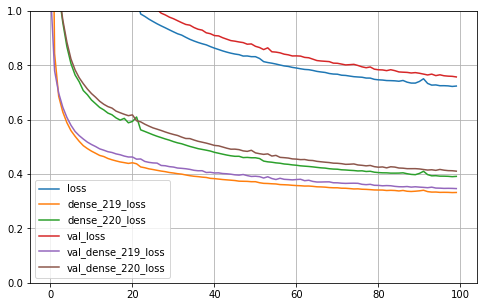

In [68]:
plot_history_curves(history)

In [69]:
model.evaluate([x_test_house_scaled_wide,x_test_house_scaled_deep],y_test_house,verbose=0)

[0.7400879859924316, 0.33980199694633484, 0.4002860486507416]

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8484 - val_loss: 0.6622
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5954 - val_loss: 0.4866
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4450 - val_loss: 0.4524
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4224 - val_loss: 0.4335
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4092 - val_loss: 0.4213
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4045 - val_loss: 0.4138
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4030 - val_loss: 0.4051
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3890 - val_loss: 0.4024
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3820 - val_loss: 0.3972
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4038 - val_loss: 0.3874

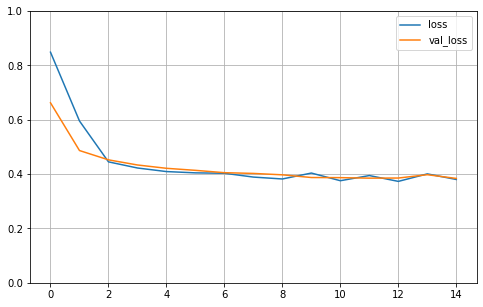

lr= 0.03
nan nan


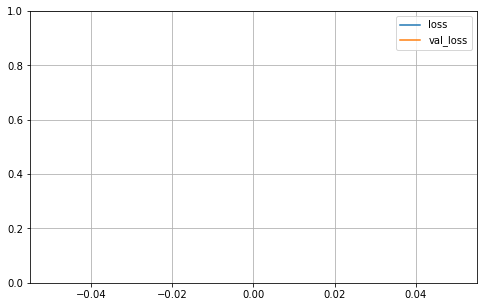

lr= 0.3
nan nan


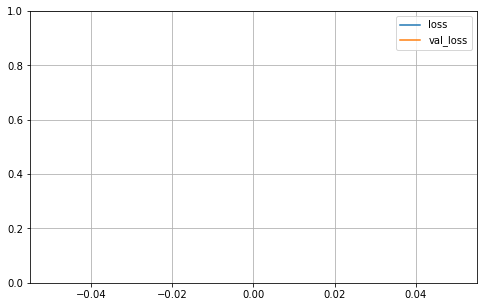

In [72]:
learning_rates=[1e-2,3e-2,3e-1]
histories=[]
for lr in learning_rates:
    model=keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=x_train_house.shape[1:]),keras.layers.Dense(1)])
    optimizer=keras.optimizers.SGD(lr)
    model.compile(loss='mse',optimizer=optimizer)
    callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
    history=model.fit(x_train_house_scaled,y_train_house,validation_data=(x_valid_house_scaled,y_valid_house),
                     epochs=20,callbacks=callbacks)
    histories.append(history)
for lr,history in zip(learning_rates,histories):
    print('lr=',lr)
    print(history.history['loss'][-1],history.history['val_loss'][-1])
    plot_history_curves(history)
    
    

In [74]:
def build_model(hidden_layers=1,layer_size=30,learning_rate=3e-3):
    model=keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size,activation='relu',input_shape=x_train_house.shape[1:]))
    for _ in range(hidden_layers-1):
        model.add(keras.layers.Dense(layer_size,activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse',optimizer=optimizer)
    return model

In [78]:
sklearn_model=tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
param_distribution={'hidden_layers':[1,2,3,4],'layer_size':[5,10,20,30],'learning_rate':[1e-4,5e-5,1e-3,5e-3,1e-2]}
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_search_cv=RandomizedSearchCV(sklearn_model,param_distribution)
random_search_cv.fit(x_train_house_scaled,y_train_house,validation_data=(x_valid_house_scaled,y_valid_house),epochs=5,callbacks=callbacks)


C:\Users\gdmmx\AppData\Local\Temp/ipykernel_12416/3427205954.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  sklearn_model=tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)


Epoch 1/5
291/291 [==============================] - 3s 6ms/step - loss: 1.1396 - val_loss: 0.6752
Epoch 2/5
291/291 [==============================] - 1s 5ms/step - loss: 0.6122 - val_loss: 0.5794
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.5298 - val_loss: 0.5254
Epoch 4/5
291/291 [==============================] - 1s 5ms/step - loss: 0.4904 - val_loss: 0.4883
Epoch 5/5
73/73 [==============================] - 0s 4ms/step - loss: 0.4113
Epoch 1/5
291/291 [==============================] - 2s 4ms/step - loss: 1.0095 - val_loss: 0.6168
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.5380 - val_loss: 0.5421
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4857 - val_loss: 0.4989
Epoch 4/5
291/291 [==============================] - 1s 5ms/step - loss: 0.4631 - val_loss: 0.4774
Epoch 5/5
73/73 [==============================] - 0s 3ms/step - loss: 0.4429
Epoch 1/5
291/291 [==============================] -

291/291 [==============================] - 1s 2ms/step - loss: 3.8397 - val_loss: 3.6422
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 2.9940
Epoch 1/5
291/291 [==============================] - 1s 3ms/step - loss: 4.1359 - val_loss: 3.7819
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 3.2060 - val_loss: 2.8754
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 2.4096 - val_loss: 2.1538
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 1.8318 - val_loss: 1.6831
Epoch 5/5
73/73 [==============================] - 0s 3ms/step - loss: 1.4471
Epoch 1/5
291/291 [==============================] - 2s 5ms/step - loss: 5.1641 - val_loss: 5.1730
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 4.6887 - val_loss: 4.7101
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 4.2602 - val_loss: 4.2903
Epoch 4/5
291/291 [==============================] - 1s 4ms/st

291/291 [==============================] - 1s 3ms/step - loss: 5.7195 - val_loss: 5.4805
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 4.8830 - val_loss: 4.6985
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 4.2189 - val_loss: 4.0770
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 3.6818 - val_loss: 3.5702
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 3.1612
Epoch 1/5
291/291 [==============================] - 1s 3ms/step - loss: 2.9265 - val_loss: 1.6934
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 1.2753 - val_loss: 1.1589
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.9681 - val_loss: 0.9293
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.8229 - val_loss: 0.8181
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.7164
Epoch 1/5
291/291 [==============================] - 1s 2ms/st

291/291 [==============================] - 1s 4ms/step - loss: 6.1977 - val_loss: 6.3018
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.2701
Epoch 1/5
291/291 [==============================] - 2s 4ms/step - loss: 5.0568 - val_loss: 5.0678
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 4.5896 - val_loss: 4.6110
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 4.1815 - val_loss: 4.2108
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 3.8253 - val_loss: 3.8585
Epoch 5/5
73/73 [==============================] - 0s 3ms/step - loss: 3.4355
Epoch 1/5
291/291 [==============================] - 2s 4ms/step - loss: 0.9012 - val_loss: 0.7343
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.8671 - val_loss: 0.5645
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4898 - val_loss: 0.4760
Epoch 4/5
291/291 [==============================] - 1s 4ms/st

C:\Users\gdmmx\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.45899631 -0.69435428 -2.55748227 -2.6534842  -0.73604571 -2.87566936
 -0.68063495 -0.504028   -3.63890076         nan]
  warnings.warn(


363/363 [==============================] - 2s 4ms/step - loss: 0.9609 - val_loss: 0.5916
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5182 - val_loss: 0.5149
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4572 - val_loss: 0.4605
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4261 - val_loss: 0.4302
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4106 - val_loss: 0.4154


RandomizedSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000018331514DF0>,
                   param_distributions={'hidden_layers': [1, 2, 3, 4],
                                        'layer_size': [5, 10, 20, 30],
                                        'learning_rate': [0.0001, 5e-05, 0.001,
                                                          0.005, 0.01]})

In [79]:
random_search_cv.best_params_

{'learning_rate': 0.005, 'layer_size': 20, 'hidden_layers': 2}

In [80]:
random_search_cv.best_score_

-0.45899630784988404

In [81]:
model=random_search_cv.best_estimator_.model
model.evaluate(x_test_house_scaled,y_test_house,verbose=0)

0.4125659167766571